In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob as gb
import pickle
import cv2

In [2]:
!pip install opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/datasets/imthebaron/testing-face-data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: imthebaron
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/imthebaron/testing-face-data


100%|██████████| 2.63G/2.63G [00:35<00:00, 79.2MB/s]


In [3]:
data_path = '/content/testing-face-data/yolo_faces/yolo_faces'

In [4]:
IMG_SIZE = 224
BATCH_SIZE = 16

399


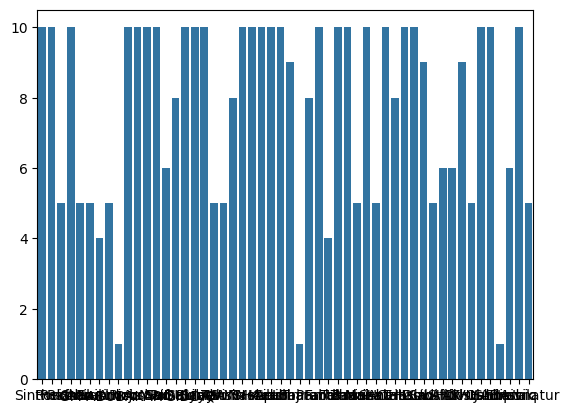

In [5]:
classes = []
class_count = []
train_examples = 0

for f in os.listdir(data_path):
  files = gb.glob(pathname = str(data_path + '//' + f + '//' + '/*'))
  classes.append(f)
  class_count.append(len(files))
  train_examples += len(files)

sns.barplot(x=classes, y=class_count)
print(train_examples)

In [6]:
len(classes), classes

(52,
 ['Sintheia',
  'Rono',
  'Rokon',
  'Rafsan',
  'Abir',
  'Shakibul',
  'Sanim',
  'Prachurjo',
  'Arnob',
  'Rizon',
  'GM ABUBAKAR SIDDIQ',
  'Arshad',
  'Saif',
  'MRIDUL',
  'Sumaiya',
  'Sakib',
  'Ridoy',
  'Sayem',
  'Alvi',
  'SUN',
  'MAYSHA',
  'Tahsin Kabir',
  'Rassel',
  'Mehrab',
  'Siam',
  'Apurba',
  'Taj',
  'Ishmam',
  'Shatabdi',
  'Pranto',
  'Farhan',
  'Talha',
  'Zarin',
  'Ramisa',
  'Nishat',
  'Maishara',
  'Avizit',
  'SHOHIDUL',
  'Tahsin',
  'Hasib',
  'Sadi',
  'Kowshik',
  'Afif',
  'SHUVO',
  'Dristi',
  'ASHHAB',
  'Khushbu',
  'Jahin',
  'Sudipta',
  'Shaivik',
  'Ashiq',
  'Hasnatur'])

In [7]:
p = open('/content/classes.pkl', 'wb')
pickle.dump(classes, p)
p.close()

In [8]:
classes = []
p = open('/content/classes.pkl', 'rb')
classes = pickle.load(p)
print(len(classes), classes)

52 ['Sintheia', 'Rono', 'Rokon', 'Rafsan', 'Abir', 'Shakibul', 'Sanim', 'Prachurjo', 'Arnob', 'Rizon', 'GM ABUBAKAR SIDDIQ', 'Arshad', 'Saif', 'MRIDUL', 'Sumaiya', 'Sakib', 'Ridoy', 'Sayem', 'Alvi', 'SUN', 'MAYSHA', 'Tahsin Kabir', 'Rassel', 'Mehrab', 'Siam', 'Apurba', 'Taj', 'Ishmam', 'Shatabdi', 'Pranto', 'Farhan', 'Talha', 'Zarin', 'Ramisa', 'Nishat', 'Maishara', 'Avizit', 'SHOHIDUL', 'Tahsin', 'Hasib', 'Sadi', 'Kowshik', 'Afif', 'SHUVO', 'Dristi', 'ASHHAB', 'Khushbu', 'Jahin', 'Sudipta', 'Shaivik', 'Ashiq', 'Hasnatur']


In [9]:
def ImageGen(model_name = 'resnet50'):

      if model_name == 'resnet50':
            preprocessing = tf.keras.applications.resnet50.preprocess_input
      elif model_name == 'densenet121':
            preprocessing = tf.keras.applications.densenet.preprocess_input
      elif model_name == 'xception':
            preprocessing = tf.keras.applications.xception.preprocess_input

      train_gen = ImageDataGenerator(
      rotation_range=15,
      width_shift_range=0.15,
      height_shift_range=0.15,
      horizontal_flip=True,
      zoom_range = 0.15,
      #preprocessing_function = tf.keras.applications.vgg16.preprocess_input
      #preprocessing_function = tf.keras.applications.mobilenet.preprocess_input,
      preprocessing_function = preprocessing,
      validation_split = 0.2
  )
      return train_gen

In [ ]:
train_gen = ImageGen(model_name = 'resnet50')

In [ ]:
train_batches = train_gen.flow_from_directory(
          directory = data_path,
          target_size = (IMG_SIZE, IMG_SIZE),
          class_mode='sparse',
          batch_size = BATCH_SIZE,
          subset = 'training'
      )

valid_batches = train_gen.flow_from_directory(
    directory = data_path,
    target_size = (IMG_SIZE, IMG_SIZE),
    class_mode='sparse',
    batch_size = BATCH_SIZE,
    subset = 'validation'
)

Found 327 images belonging to 52 classes.
Found 72 images belonging to 52 classes.


In [16]:
class_indices = train_batches.class_indices  # Dictionary mapping class names to integer labels

# Step 2: Invert the class_indices dictionary to get a mapping from labels to class names
class_names = {v: k for k, v in class_indices.items()}

# Output class names
print(class_names)

p = open('/content/class_names.pkl', 'wb')
pickle.dump(class_names, p)
p.close()

{0: 'ASHHAB', 1: 'Abir', 2: 'Afif', 3: 'Alvi', 4: 'Apurba', 5: 'Arnob', 6: 'Arshad', 7: 'Ashiq', 8: 'Avizit', 9: 'Dristi', 10: 'Farhan', 11: 'GM ABUBAKAR SIDDIQ', 12: 'Hasib', 13: 'Hasnatur', 14: 'Ishmam', 15: 'Jahin', 16: 'Khushbu', 17: 'Kowshik', 18: 'MAYSHA', 19: 'MRIDUL', 20: 'Maishara', 21: 'Mehrab', 22: 'Nishat', 23: 'Prachurjo', 24: 'Pranto', 25: 'Rafsan', 26: 'Ramisa', 27: 'Rassel', 28: 'Ridoy', 29: 'Rizon', 30: 'Rokon', 31: 'Rono', 32: 'SHOHIDUL', 33: 'SHUVO', 34: 'SUN', 35: 'Sadi', 36: 'Saif', 37: 'Sakib', 38: 'Sanim', 39: 'Sayem', 40: 'Shaivik', 41: 'Shakibul', 42: 'Shatabdi', 43: 'Siam', 44: 'Sintheia', 45: 'Sudipta', 46: 'Sumaiya', 47: 'Tahsin', 48: 'Tahsin Kabir', 49: 'Taj', 50: 'Talha', 51: 'Zarin'}


# resnet50 (not trainable)

In [ ]:
img_shape = (IMG_SIZE, IMG_SIZE) + (3,)
base_model = tf.keras.applications.ResNet50(
    input_shape = img_shape,
    include_top = False,
    weights = 'imagenet'
)

inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(2048, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
outputs = tf.keras.layers.Dense(len(classes), activation='softmax')(x)
model = tf.keras.Model(inputs, outputs, name='custom-resnet50-untrainable')
model.summary()

In [ ]:
#base_model = tf.keras.applications.VGG16(include_top=False)
base_model = tf.keras.applications.ResNet50(include_top=False)
base_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, None, None, 3)  │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, None, None, 64) │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, None, None, 64) │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, None, None, 64) │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, None, None, 64) │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, None, None, 64) │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, None, None, 64) │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, None, None, 64) │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, None, None, 64) │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, None, None, 64) │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, None, None, 64) │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, None, None, 64) │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, None, None,     │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │ 256)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, None, None,     │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │ 256)                   │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',   # Metric to monitor (can be 'loss', 'accuracy', etc.)
    factor=0.01,           # Factor by which the learning rate will be reduced
    patience=15,           # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-18           # Lower bound on the learning rate
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation accuracy
    min_delta=0.001,         # Minimum change in monitored value to qualify as improvement
    patience=30,             # Stop after 10 epochs of no improvement
    mode='min',              # Maximize the validation accuracy
    restore_best_weights=True,  # Restore model weights from the best epoch
    verbose=1
)

In [ ]:
h = model.fit(
    train_batches,
    epochs = 250,
    steps_per_epoch = 327 // BATCH_SIZE,
    validation_data = valid_batches,
    validation_steps = 72 // BATCH_SIZE,
    #callbacks = [reduce_lr, early_stopping]
    callbacks = [reduce_lr]
)

Epoch 1/250


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.0349 - loss: 4.0743 - val_accuracy: 0.1094 - val_loss: 3.7013 - learning_rate: 1.0000e-04
Epoch 2/250
 1/20 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - accuracy: 0.0625 - loss: 3.5859

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - accuracy: 0.0625 - loss: 3.5859 - val_accuracy: 0.1250 - val_loss: 3.5225 - learning_rate: 1.0000e-04
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 307ms/step - accuracy: 0.2267 - loss: 3.1753 - val_accuracy: 0.3125 - val_loss: 2.8900 - learning_rate: 1.0000e-04
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1250 - loss: 3.3015 - val_accuracy: 0.3750 - val_loss: 2.4211 - learning_rate: 1.0000e-04
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 244ms/step - accuracy: 0.5015 - loss: 2.3153 - val_accuracy: 0.4219 - val_loss: 2.1206 - learning_rate: 1.0000e-04
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6250 - loss: 1.7343 - val_accuracy: 0.3750 - val_loss: 1.7108 - learning_rate: 1.0000e-04
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 310ms/step - accuracy: 0.7461 - loss: 1.3738 - val_accuracy: 0.6094 - val_loss: 1.5464 - learning_rate: 1.0000e-04
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7500 - lo

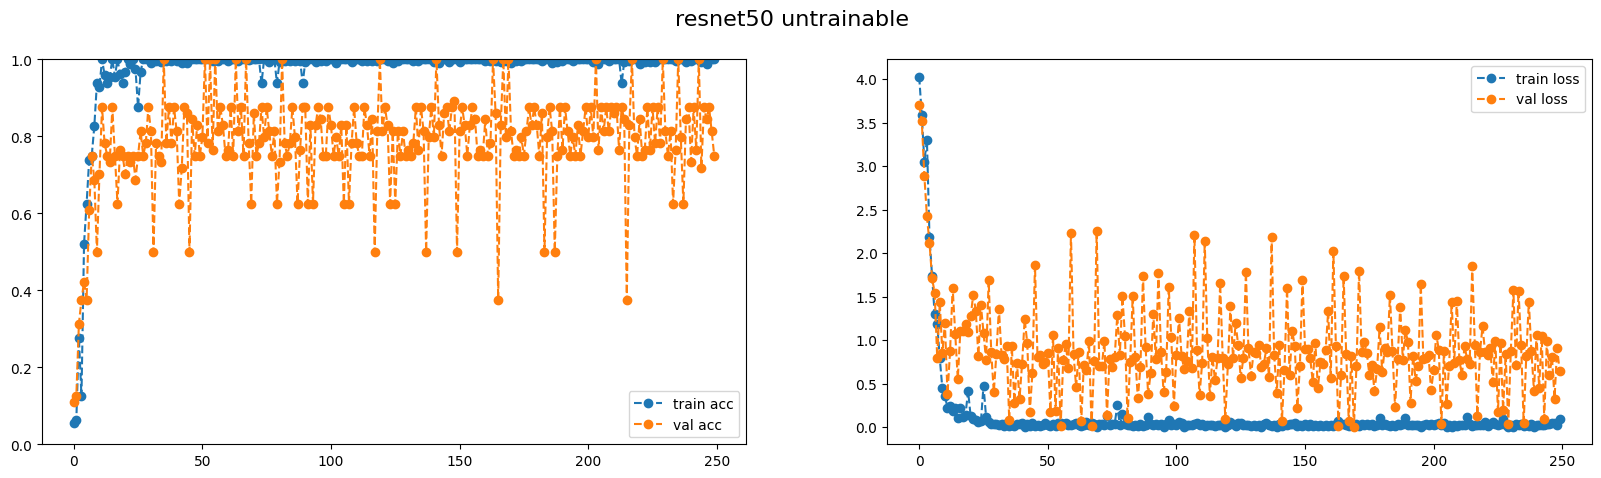

In [ ]:
plt.figure(figsize = (20, 5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o', label='train acc')
plt.plot(h.history['val_accuracy'], '--o', label='val acc')
plt.legend()
plt.ylim([0,1])
plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o', label='train loss')
plt.plot(h.history['val_loss'], '--o', label='val loss')
plt.legend()
plt.suptitle('resnet50 untrainable', fontsize=16)

plt.savefig('resnet50_training_nofinetuning.png', format='png', dpi=400)
plt.show()

In [ ]:
model.save('resnet_untrainable_yolo.keras')

In [ ]:
model = tf.keras.models.load_model('/content/resnet_untrainable_yolo.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 220 variables whereas the saved optimizer has 438 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
 Predicted label is:Abir


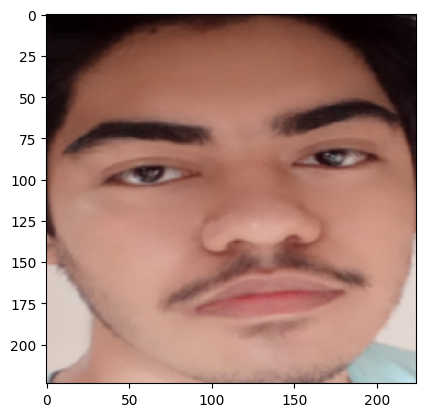

In [ ]:

img = tf.keras.utils.load_img('/content/testing-face-data/yolo_faces/yolo_faces/Rono/6.png', target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

img_predictions = model.predict(img_array)

pred_label = class_names[np.argmax(np.round(img_predictions,2))]
print(" Predicted label is:"+ pred_label)

#if you also want to display the image that was passed use the code below
plt.imshow(img)

# resnet50 (trainable)

In [ ]:
img_shape = (IMG_SIZE, IMG_SIZE) + (3,)
base_model = tf.keras.applications.ResNet50(
    input_shape = img_shape,
    include_top = False,
    weights = 'imagenet'
)

inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(2048, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
outputs = tf.keras.layers.Dense(len(classes), activation='softmax')(x)
model = tf.keras.Model(inputs, outputs, name='finetuned.resnet50')
model.summary()

Model: "finetuned.resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2048)                │       4,196,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 52)                  │          53,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,935,540 (114.20 MB)

 Trainable params: 29,882,420 (113.99 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',   # Metric to monitor (can be 'loss', 'accuracy', etc.)
    factor=0.01,           # Factor by which the learning rate will be reduced
    patience=15,           # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-18           # Lower bound on the learning rate
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation accuracy
    min_delta=0.001,         # Minimum change in monitored value to qualify as improvement
    patience=30,             # Stop after 10 epochs of no improvement
    mode='min',              # Maximize the validation accuracy
    restore_best_weights=True,  # Restore model weights from the best epoch
    verbose=1
)

In [ ]:
h = model.fit(
    train_batches,
    epochs = 250,
    steps_per_epoch = 327 // BATCH_SIZE,
    validation_data = valid_batches,
    validation_steps = 72 // BATCH_SIZE,
    #callbacks = [reduce_lr, early_stopping]
    callbacks = [reduce_lr]
)

Epoch 1/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.0606 - loss: 4.0275 - val_accuracy: 0.0781 - val_loss: 3.7216 - learning_rate: 1.0000e-04
Epoch 2/250
 1/20 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - accuracy: 0.0625 - loss: 3.6391

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.0625 - loss: 3.6391 - val_accuracy: 0.0000e+00 - val_loss: 3.7608 - learning_rate: 1.0000e-04
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 324ms/step - accuracy: 0.2656 - loss: 3.2021 - val_accuracy: 0.2656 - val_loss: 2.8793 - learning_rate: 1.0000e-04
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1875 - loss: 3.3070 - val_accuracy: 0.1250 - val_loss: 3.7924 - learning_rate: 1.0000e-04
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 285ms/step - accuracy: 0.5178 - loss: 2.2082 - val_accuracy: 0.3750 - val_loss: 2.2571 - learning_rate: 1.0000e-04
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7500 - loss: 1.5644 - val_accuracy: 0.2500 - val_loss: 2.4884 - learning_rate: 1.0000e-04
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 249ms/step - accuracy: 0.7507 - loss: 1.3091 - val_accuracy: 0.4531 - val_loss: 1.9039 - learning_rate: 1.0000e-04
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5714 

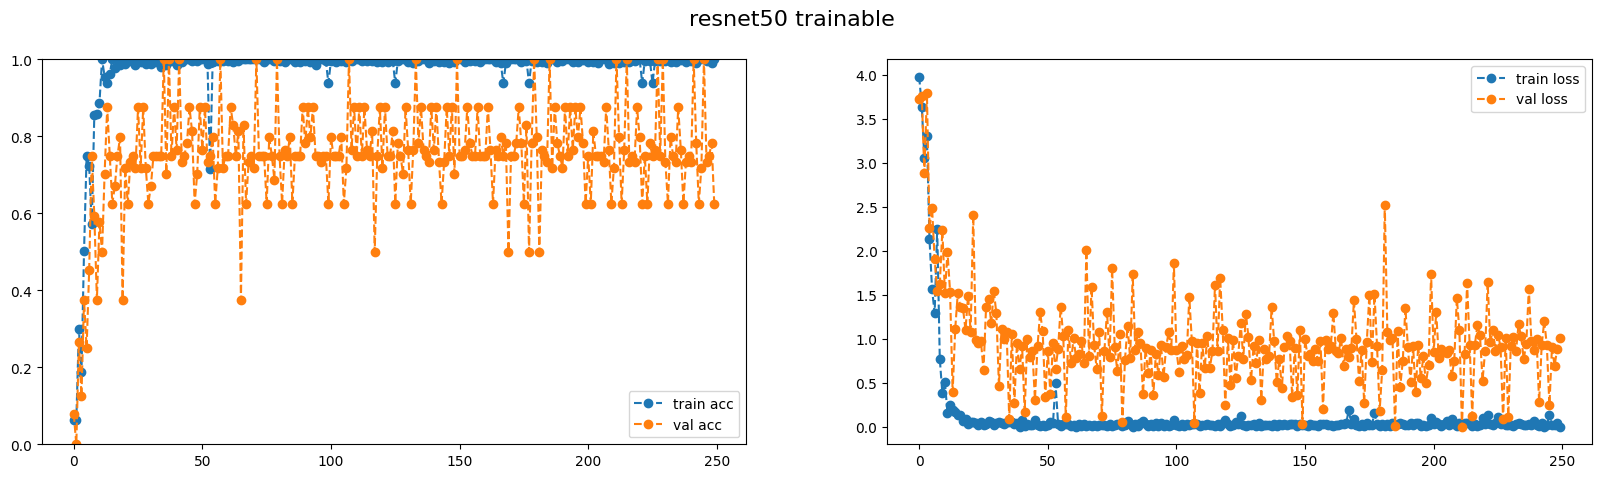

In [ ]:
plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o', label='train acc')
plt.plot(h.history['val_accuracy'], '--o', label='val acc')
plt.legend()
plt.ylim([0,1])
plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o', label='train loss')
plt.plot(h.history['val_loss'], '--o', label='val loss')
plt.legend()
plt.suptitle('resnet50 trainable', fontsize=16)
plt.savefig('resnet50_training_finetuning.png', format='png', dpi=400)
plt.show()

In [ ]:
model.save('resnet_trainable_yolo.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
 Predicted label is:Saif


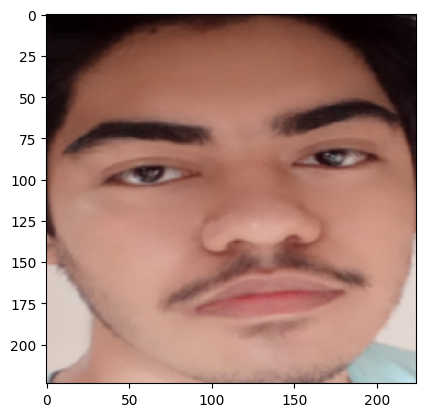

In [ ]:

img = tf.keras.utils.load_img('/content/testing-face-data/yolo_faces/yolo_faces/Rono/6.png', target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

img_predictions = model.predict(img_array)

pred_label = class_names[np.argmax(np.round(img_predictions,2))]
print(" Predicted label is:"+ pred_label)

#if you also want to display the image that was passed use the code below
plt.imshow(img)

# densenet121 (not trainable)

In [ ]:
class_indices = train_batches.class_indices  # Dictionary mapping class names to integer labels

# Step 2: Invert the class_indices dictionary to get a mapping from labels to class names
class_names = {v: k for k, v in class_indices.items()}

# Output class names
print(class_names)

p = open('/content/class_names.pkl', 'wb')
pickle.dump(class_names, p)
p.close()

{0: 'ASHHAB', 1: 'Abir', 2: 'Afif', 3: 'Alvi', 4: 'Apurba', 5: 'Arnob', 6: 'Arshad', 7: 'Ashiq', 8: 'Avizit', 9: 'Dristi', 10: 'Farhan', 11: 'GM ABUBAKAR SIDDIQ', 12: 'Hasib', 13: 'Hasnatur', 14: 'Ishmam', 15: 'Jahin', 16: 'Khushbu', 17: 'Kowshik', 18: 'MAYSHA', 19: 'MRIDUL', 20: 'Maishara', 21: 'Mehrab', 22: 'Nishat', 23: 'Prachurjo', 24: 'Pranto', 25: 'Rafsan', 26: 'Ramisa', 27: 'Rassel', 28: 'Ridoy', 29: 'Rizon', 30: 'Rokon', 31: 'Rono', 32: 'SHOHIDUL', 33: 'SHUVO', 34: 'SUN', 35: 'Sadi', 36: 'Saif', 37: 'Sakib', 38: 'Sanim', 39: 'Sayem', 40: 'Shaivik', 41: 'Shakibul', 42: 'Shatabdi', 43: 'Siam', 44: 'Sintheia', 45: 'Sudipta', 46: 'Sumaiya', 47: 'Tahsin', 48: 'Tahsin Kabir', 49: 'Taj', 50: 'Talha', 51: 'Zarin'}


In [ ]:
train_gen = ImageGen(model_name = 'densenet121')

In [ ]:
train_batches = train_gen.flow_from_directory(
          directory = data_path,
          target_size = (IMG_SIZE, IMG_SIZE),
          class_mode='sparse',
          batch_size = BATCH_SIZE,
          subset = 'training'
      )

valid_batches = train_gen.flow_from_directory(
    directory = data_path,
    target_size = (IMG_SIZE, IMG_SIZE),
    class_mode='sparse',
    batch_size = BATCH_SIZE,
    subset = 'validation'
)

Found 327 images belonging to 52 classes.
Found 72 images belonging to 52 classes.


In [ ]:
img_shape = (IMG_SIZE, IMG_SIZE) + (3,)
base_model = tf.keras.applications.DenseNet121(
    input_shape = img_shape,
    include_top = False,
    weights = 'imagenet'
)

inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(2048, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
outputs = tf.keras.layers.Dense(len(classes), activation='softmax')(x)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = tf.keras.Model(inputs, outputs, name='custom_densenet_untrainable')
model.summary()

Model: "custom_densenet_untrainable"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densenet121 (Functional)             │ (None, 7, 7, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2048)                │       2,099,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 52)                  │          53,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,288,180 (43.06 MB)

 Trainable params: 11,204,532 (42.74 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',   # Metric to monitor (can be 'loss', 'accuracy', etc.)
    factor=0.01,           # Factor by which the learning rate will be reduced
    patience=15,           # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-18           # Lower bound on the learning rate
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation accuracy
    min_delta=0.001,         # Minimum change in monitored value to qualify as improvement
    patience=30,             # Stop after 10 epochs of no improvement
    mode='min',              # Maximize the validation accuracy
    restore_best_weights=True,  # Restore model weights from the best epoch
    verbose=1
)

In [ ]:
h = model.fit(
    train_batches,
    epochs = 250,
    steps_per_epoch = 327 // BATCH_SIZE,
    validation_data = valid_batches,
    validation_steps = 72 // BATCH_SIZE,
    #callbacks = [reduce_lr, early_stopping]
    callbacks = [reduce_lr]
)

Epoch 1/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 327s 8s/step - accuracy: 0.0303 - loss: 4.1571 - val_accuracy: 0.0625 - val_loss: 3.8365 - learning_rate: 1.0000e-04
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 434ms/step - accuracy: 0.0625 - loss: 4.0324 - val_accuracy: 0.1250 - val_loss: 3.7078 - learning_rate: 1.0000e-04
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 295ms/step - accuracy: 0.1124 - loss: 3.6724 - val_accuracy: 0.1250 - val_loss: 3.5997 - learning_rate: 1.0000e-04
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3125 - loss: 3.3861 - val_accuracy: 0.1250 - val_loss: 3.5083 - learning_rate: 1.0000e-04
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 274ms/step - accuracy: 0.2289 - loss: 3.2427 - val_accuracy: 0.2969 - val_loss: 3.1644 - learning_rate: 1.0000e-04
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4375 - loss: 2.7572 - val_accuracy: 0.1250 - val_loss: 3.1191 - learning_rate: 1.0000e-04
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 267ms/step - accuracy

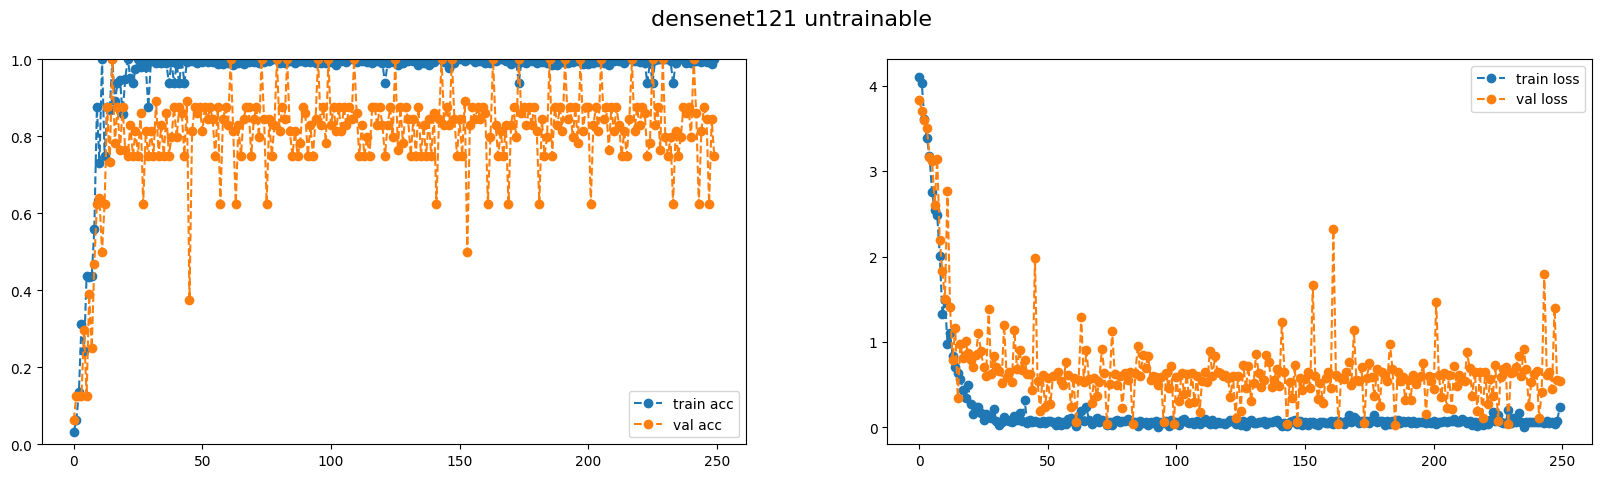

In [ ]:
plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)

plt.plot(h.history['accuracy'], '--o', label='train acc')
plt.plot(h.history['val_accuracy'], '--o', label='val acc')
plt.legend()
plt.ylim([0,1])
plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o', label='train loss')
plt.plot(h.history['val_loss'], '--o', label='val loss')
plt.legend()

plt.suptitle('densenet121 untrainable', fontsize=16)
plt.savefig('densenet121_training_nofinetuning.png', format='png', dpi=400)
plt.show()

In [ ]:
model.save('densenet-untrainable-yolo.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
 Predicted label is:Talha


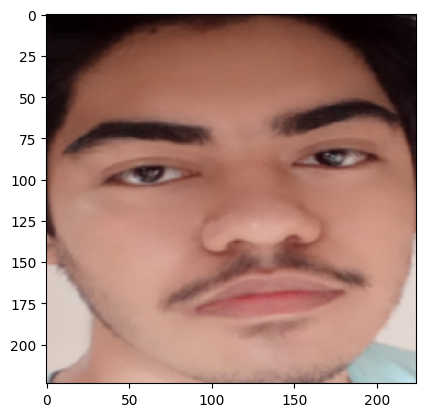

In [ ]:

img = tf.keras.utils.load_img('/content/testing-face-data/yolo_faces/yolo_faces/Rono/6.png', target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

img_predictions = model.predict(img_array)

pred_label = class_names[np.argmax(np.round(img_predictions,2))]
print(" Predicted label is:"+ pred_label)

#if you also want to display the image that was passed use the code below
plt.imshow(img)

# densenet121 (trainable)

In [ ]:
img_shape = (IMG_SIZE, IMG_SIZE) + (3,)
base_model = tf.keras.applications.DenseNet121(
    input_shape = img_shape,
    include_top = False,
    weights = 'imagenet'
)

inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(2048, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
outputs = tf.keras.layers.Dense(len(classes), activation='softmax')(x)

In [ ]:
model = tf.keras.Model(inputs, outputs, name='custom_densenet_trainable')
model.summary()

Model: "custom_densenet_trainable"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densenet121 (Functional)             │ (None, 7, 7, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 2048)                │       2,099,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 52)                  │          53,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,288,180 (43.06 MB)

 Trainable params: 11,204,532 (42.74 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',   # Metric to monitor (can be 'loss', 'accuracy', etc.)
    factor=0.01,           # Factor by which the learning rate will be reduced
    patience=15,           # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-18           # Lower bound on the learning rate
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation accuracy
    min_delta=0.001,         # Minimum change in monitored value to qualify as improvement
    patience=30,             # Stop after 10 epochs of no improvement
    mode='min',              # Maximize the validation accuracy
    restore_best_weights=True,  # Restore model weights from the best epoch
    verbose=1
)

In [ ]:
h = model.fit(
    train_batches,
    epochs = 250,
    steps_per_epoch = 327 // BATCH_SIZE,
    validation_data = valid_batches,
    validation_steps = 72 // BATCH_SIZE,
    #callbacks = [reduce_lr, early_stopping]
    callbacks = [reduce_lr]
)

Epoch 1/250


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 159s 766ms/step - accuracy: 0.0189 - loss: 4.1256 - val_accuracy: 0.0156 - val_loss: 3.9110 - learning_rate: 1.0000e-04
Epoch 2/250
 1/20 ━━━━━━━━━━━━━━━━━━━━ 29:16 92s/step - accuracy: 0.4286 - loss: 3.6758

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 97s 219ms/step - accuracy: 0.4286 - loss: 3.6758 - val_accuracy: 0.1250 - val_loss: 3.7867 - learning_rate: 1.0000e-04
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 308ms/step - accuracy: 0.1649 - loss: 3.5383 - val_accuracy: 0.1406 - val_loss: 3.5958 - learning_rate: 1.0000e-04
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.1250 - loss: 3.5437 - val_accuracy: 0.1250 - val_loss: 3.6571 - learning_rate: 1.0000e-04
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - accuracy: 0.2225 - loss: 3.1612 - val_accuracy: 0.2188 - val_loss: 3.2885 - learning_rate: 1.0000e-04
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3750 - loss: 2.8805 - val_accuracy: 0.1250 - val_loss: 3.4968 - learning_rate: 1.0000e-04
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 255ms/step - accuracy: 0.4948 - loss: 2.5402 - val_accuracy: 0.3281 - val_loss: 2.7577 - learning_rate: 1.0000e-04
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3125 

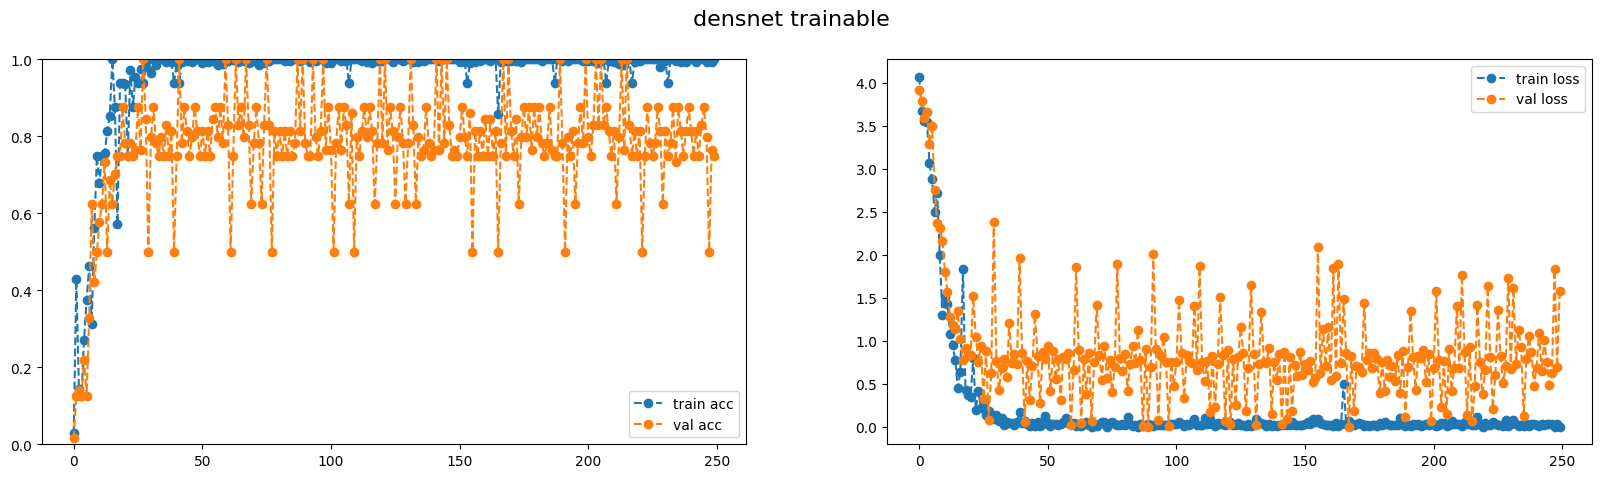

In [ ]:
plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o', label='train acc')
plt.plot(h.history['val_accuracy'], '--o', label='val acc')
plt.legend()
plt.ylim([0,1])
plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o', label='train loss')
plt.plot(h.history['val_loss'], '--o', label='val loss')
plt.legend()
plt.suptitle('densnet trainable', fontsize=16)
plt.savefig('densenet121_training_finetuning.png', format='png', dpi=400)
plt.show()

In [ ]:
model.save('densenet-trainable-yolo.keras')

In [ ]:

img = tf.keras.utils.load_img('/content/testing-face-data/yolo_faces/yolo_faces/Rono/6.png', target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

img_predictions = model.predict(img_array)

pred_label = class_names[np.argmax(np.round(img_predictions,2))]
print(" Predicted label is:"+ pred_label)

#if you also want to display the image that was passed use the code below
plt.imshow(img)

# xception (not trainable)

In [ ]:
class_indices = train_batches.class_indices  # Dictionary mapping class names to integer labels

# Step 2: Invert the class_indices dictionary to get a mapping from labels to class names
class_names = {v: k for k, v in class_indices.items()}

# Output class names
print(class_names)

p = open('/content/class_names.pkl', 'wb')
pickle.dump(class_names, p)
p.close()

{0: 'ASHHAB', 1: 'Abir', 2: 'Afif', 3: 'Alvi', 4: 'Apurba', 5: 'Arnob', 6: 'Arshad', 7: 'Ashiq', 8: 'Avizit', 9: 'Dristi', 10: 'Farhan', 11: 'GM ABUBAKAR SIDDIQ', 12: 'Hasib', 13: 'Hasnatur', 14: 'Ishmam', 15: 'Jahin', 16: 'Khushbu', 17: 'Kowshik', 18: 'MAYSHA', 19: 'MRIDUL', 20: 'Maishara', 21: 'Mehrab', 22: 'Nishat', 23: 'Prachurjo', 24: 'Pranto', 25: 'Rafsan', 26: 'Ramisa', 27: 'Rassel', 28: 'Ridoy', 29: 'Rizon', 30: 'Rokon', 31: 'Rono', 32: 'SHOHIDUL', 33: 'SHUVO', 34: 'SUN', 35: 'Sadi', 36: 'Saif', 37: 'Sakib', 38: 'Sanim', 39: 'Sayem', 40: 'Shaivik', 41: 'Shakibul', 42: 'Shatabdi', 43: 'Siam', 44: 'Sintheia', 45: 'Sudipta', 46: 'Sumaiya', 47: 'Tahsin', 48: 'Tahsin Kabir', 49: 'Taj', 50: 'Talha', 51: 'Zarin'}


In [ ]:
train_gen = ImageGen(model_name = 'xception')

In [ ]:
train_batches = train_gen.flow_from_directory(
          directory = data_path,
          target_size = (IMG_SIZE, IMG_SIZE),
          class_mode='sparse',
          batch_size = BATCH_SIZE,
          subset = 'training'
      )

valid_batches = train_gen.flow_from_directory(
    directory = data_path,
    target_size = (IMG_SIZE, IMG_SIZE),
    class_mode='sparse',
    batch_size = BATCH_SIZE,
    subset = 'validation'
)

Found 327 images belonging to 52 classes.
Found 72 images belonging to 52 classes.


In [ ]:
img_shape = (IMG_SIZE, IMG_SIZE) + (3,)
base_model = tf.keras.applications.Xception(
    input_shape = img_shape,
    include_top = False,
    weights = 'imagenet'
)

inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(2048, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
outputs = tf.keras.layers.Dense(len(classes), activation='softmax')(x)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
model = tf.keras.Model(inputs, outputs, name='custom_xception_untrainable')
model.summary()

Model: "custom_xception_untrainable"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 7, 7, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2048)                │       4,196,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 52)                  │          53,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,209,308 (103.80 MB)

 Trainable params: 27,154,780 (103.59 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',   # Metric to monitor (can be 'loss', 'accuracy', etc.)
    factor=0.01,           # Factor by which the learning rate will be reduced
    patience=15,           # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-18           # Lower bound on the learning rate
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation accuracy
    min_delta=0.001,         # Minimum change in monitored value to qualify as improvement
    patience=30,             # Stop after 10 epochs of no improvement
    mode='min',              # Maximize the validation accuracy
    restore_best_weights=True,  # Restore model weights from the best epoch
    verbose=1
)

In [ ]:
h = model.fit(
    train_batches,
    epochs = 250,
    steps_per_epoch = 327 // BATCH_SIZE,
    validation_data = valid_batches,
    validation_steps = 72 // BATCH_SIZE,
    #callbacks = [reduce_lr, early_stopping]
    callbacks = [reduce_lr]
)

Epoch 1/250


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.0346 - loss: 3.9702 - val_accuracy: 0.0156 - val_loss: 3.8831 - learning_rate: 1.0000e-04
Epoch 2/250
 1/20 ━━━━━━━━━━━━━━━━━━━━ 4s 229ms/step - accuracy: 0.0000e+00 - loss: 4.0431

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 224ms/step - accuracy: 0.0000e+00 - loss: 4.0431 - val_accuracy: 0.1250 - val_loss: 3.7577 - learning_rate: 1.0000e-04
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 294ms/step - accuracy: 0.0521 - loss: 3.7670 - val_accuracy: 0.0938 - val_loss: 3.7069 - learning_rate: 1.0000e-04
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3125 - loss: 3.3846 - val_accuracy: 0.0000e+00 - val_loss: 3.9141 - learning_rate: 1.0000e-04
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 281ms/step - accuracy: 0.2178 - loss: 3.3994 - val_accuracy: 0.2188 - val_loss: 3.4535 - learning_rate: 1.0000e-04
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1250 - loss: 3.5057 - val_accuracy: 0.3750 - val_loss: 3.0304 - learning_rate: 1.0000e-04
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 344ms/step - accuracy: 0.3836 - loss: 2.8937 - val_accuracy: 0.2656 - val_loss: 2.9838 - learning_rate: 1.0000e-04
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy:

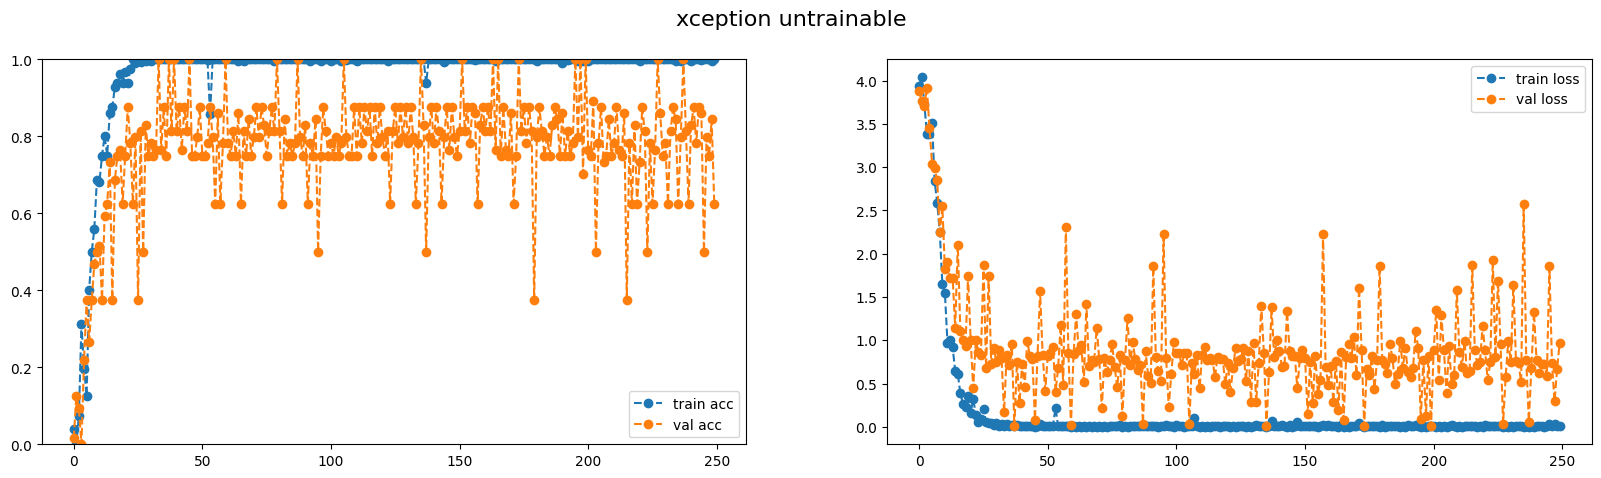

In [ ]:
plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o', label='train acc')
plt.plot(h.history['val_accuracy'], '--o', label='val acc')
plt.legend()
plt.ylim([0,1])
plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o', label='train loss')
plt.plot(h.history['val_loss'], '--o', label='val loss')
plt.legend()
plt.suptitle('xception untrainable', fontsize=16)
plt.savefig('xception_training_nofinetuning.png', format='png', dpi=400)
plt.show()

In [ ]:
model.save('xception-untrainable-yolo.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
 Predicted label is:Rassel


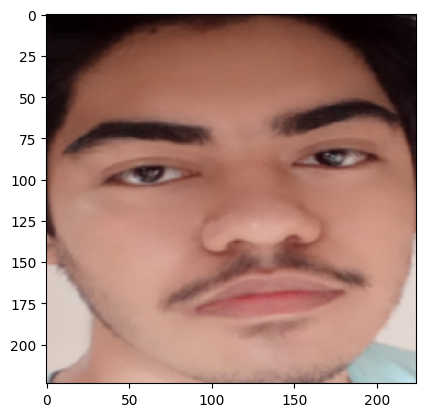

In [ ]:

img = tf.keras.utils.load_img('/content/testing-face-data/yolo_faces/yolo_faces/Rono/6.png', target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

img_predictions = model.predict(img_array)

pred_label = class_names[np.argmax(np.round(img_predictions,2))]
print(" Predicted label is:"+ pred_label)

#if you also want to display the image that was passed use the code below
plt.imshow(img)

# xception (trainable)

In [ ]:
img_shape = (IMG_SIZE, IMG_SIZE) + (3,)
base_model = tf.keras.applications.Xception(
    input_shape = img_shape,
    include_top = False,
    weights = 'imagenet'
)

inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(2048, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
outputs = tf.keras.layers.Dense(len(classes), activation='softmax')(x)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model = tf.keras.Model(inputs, outputs, name='custom_xception_trainable')
model.summary()

Model: "custom_xception_trainable"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 7, 7, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2048)                │       4,196,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 52)                  │          53,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,209,308 (103.80 MB)

 Trainable params: 27,154,780 (103.59 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',   # Metric to monitor (can be 'loss', 'accuracy', etc.)
    factor=0.01,           # Factor by which the learning rate will be reduced
    patience=15,           # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-18           # Lower bound on the learning rate
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation accuracy
    min_delta=0.001,         # Minimum change in monitored value to qualify as improvement
    patience=30,             # Stop after 10 epochs of no improvement
    mode='min',              # Maximize the validation accuracy
    restore_best_weights=True,  # Restore model weights from the best epoch
    verbose=1
)

In [ ]:
h = model.fit(
    train_batches,
    epochs = 250,
    steps_per_epoch = 327 // BATCH_SIZE,
    validation_data = valid_batches,
    validation_steps = 72 // BATCH_SIZE,
    #callbacks = [reduce_lr, early_stopping]
    callbacks = [reduce_lr]
)

Epoch 1/250


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.0230 - loss: 3.9193 - val_accuracy: 0.0938 - val_loss: 3.7635 - learning_rate: 1.0000e-04
Epoch 2/250
 1/20 ━━━━━━━━━━━━━━━━━━━━ 4s 223ms/step - accuracy: 0.0625 - loss: 3.8935

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 306ms/step - accuracy: 0.0625 - loss: 3.8935 - val_accuracy: 0.2500 - val_loss: 3.8472 - learning_rate: 1.0000e-04
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 285ms/step - accuracy: 0.1150 - loss: 3.6985 - val_accuracy: 0.0938 - val_loss: 3.6344 - learning_rate: 1.0000e-04
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1875 - loss: 3.4582 - val_accuracy: 0.2500 - val_loss: 3.3769 - learning_rate: 1.0000e-04
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 285ms/step - accuracy: 0.2271 - loss: 3.3133 - val_accuracy: 0.2188 - val_loss: 3.2361 - learning_rate: 1.0000e-04
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3750 - loss: 2.7192 - val_accuracy: 0.1250 - val_loss: 3.4170 - learning_rate: 1.0000e-04
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 361ms/step - accuracy: 0.4245 - loss: 2.6762 - val_accuracy: 0.4062 - val_loss: 2.4924 - learning_rate: 1.0000e-04
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2500 -

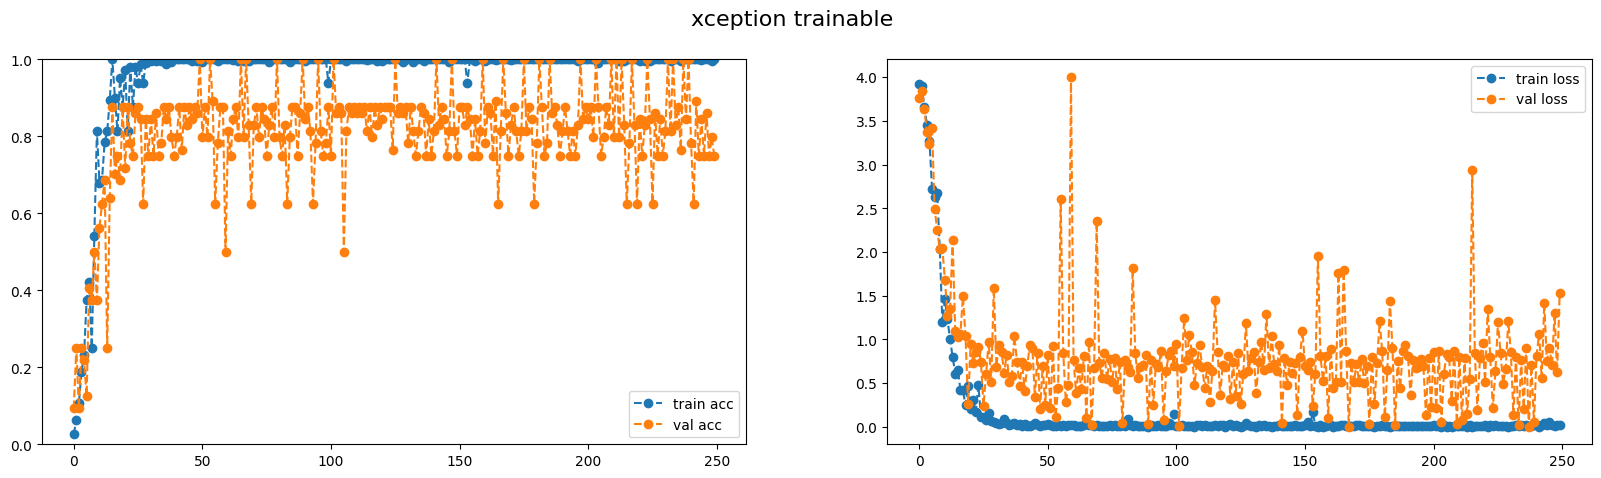

In [ ]:
plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o', label='train acc')
plt.plot(h.history['val_accuracy'], '--o', label='val acc')
plt.legend()
plt.ylim([0,1])
plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o', label='train loss')
plt.plot(h.history['val_loss'], '--o', label='val loss')
plt.legend()
plt.suptitle('xception trainable', fontsize=16)
plt.savefig('xception_training_finetuning.png', format='png', dpi=400)
plt.show()

In [ ]:
model.save('xception-trainable-yolo.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
 Predicted label is:Talha


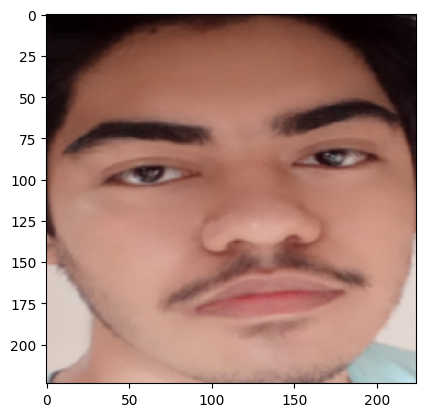

In [ ]:

img = tf.keras.utils.load_img('/content/testing-face-data/yolo_faces/yolo_faces/Rono/6.png', target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

img_predictions = model.predict(img_array)

pred_label = class_names[np.argmax(np.round(img_predictions,2))]
print(" Predicted label is:"+ pred_label)

#if you also want to display the image that was passed use the code below
plt.imshow(img)

# downloading

In [ ]:
from google.colab import files

# Replace 'your_file.txt' with the path to your file
files.download('/content/resnet_untrainable_yolo.keras')

FileNotFoundError: Cannot find file: /content/resnet_untrainable_yolo.kera

# custom model

In [12]:
train_gen = ImageDataGenerator(
      rotation_range=15,
      width_shift_range=0.15,
      height_shift_range=0.15,
      horizontal_flip=True,
      zoom_range = 0.15,
      #preprocessing_function = tf.keras.applications.vgg16.preprocess_input
      #preprocessing_function = tf.keras.applications.mobilenet.preprocess_input,
      #preprocessing_function = preprocessing,
      validation_split = 0.2
)

In [13]:
train_batches = train_gen.flow_from_directory(
          directory = data_path,
          target_size = (IMG_SIZE, IMG_SIZE),
          class_mode='sparse',
          batch_size = BATCH_SIZE,
          subset = 'training'
      )

valid_batches = train_gen.flow_from_directory(
    directory = data_path,
    target_size = (IMG_SIZE, IMG_SIZE),
    class_mode='sparse',
    batch_size = BATCH_SIZE,
    subset = 'validation'
)

Found 327 images belonging to 52 classes.
Found 72 images belonging to 52 classes.


In [19]:
import tensorflow.keras.layers as layers
from tensorflow.keras.layers import Input, Conv2D, SeparableConv2D, BatchNormalization, MaxPool2D, Dropout, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model

def custom_model():
    inputs = Input(shape=(224, 224, 3))

    x = SeparableConv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu')(inputs)
    x = SeparableConv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu')(x)
    x = BatchNormalization(momentum=0.5)(x)
    x = MaxPool2D(pool_size=(2, 2))(x)

    x = Dropout(rate=0.2)(x)

    x = SeparableConv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(x)
    x = SeparableConv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(x)
    x = BatchNormalization(momentum=0.5)(x)
    x = MaxPool2D(pool_size=(2, 2))(x)

    x = SeparableConv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu')(x)
    x = SeparableConv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu')(x)
    x = BatchNormalization(momentum=0.5)(x)
    x = MaxPool2D(pool_size=(2, 2))(x)

    x = Dropout(rate=0.2)(x)

    x = SeparableConv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu')(x)
    x = SeparableConv2D(filters=256, kernel_size=(3, 3), padding='SAME', activation='relu')(x)
    x = BatchNormalization(momentum=0.5)(x)
    x = MaxPool2D(pool_size=(2, 2))(x)

    x = SeparableConv2D(filters=256, kernel_size=(3, 3), padding='SAME', activation='relu')(x)
    x = SeparableConv2D(filters=256, kernel_size=(3, 3), padding='SAME', activation='relu')(x)
    x = BatchNormalization(momentum=0.5)(x)
    x = MaxPool2D(pool_size=(2, 2))(x)

    x = GlobalAveragePooling2D()(x)
    x = Dropout(rate=0.2)(x)

    # Dense Layers
    x = Dense(1024, activation="relu")(x)
    x = BatchNormalization(momentum=0.5)(x)

    # Output Layers
    output = layers.Dense(52, activation='softmax', name='grapheme')(x)

# Final Model
    model = Model(inputs=inputs, outputs=output, name='custom')

    return model

model = custom_model()
model.summary()

Model: "custom"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_40                  │ (None, 224, 224, 32)        │             155 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_41                  │ (None, 224, 224, 32)        │           1,344 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_42                  │ (None, 112, 112, 64)        │           2,400 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_43                  │ (None, 112, 112, 64)        │           4,736 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_44                  │ (None, 56, 56, 128)         │           8,896 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_45                  │ (None, 56, 56, 128)         │          17,664 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_46                  │ (None, 28, 28, 128)         │          17,664 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 546,735 (2.09 MB)

 Trainable params: 543,215 (2.07 MB)

 Non-trainable params: 3,520 (13.75 KB)

In [20]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',   # Metric to monitor (can be 'loss', 'accuracy', etc.)
    factor=0.01,           # Factor by which the learning rate will be reduced
    patience=15,           # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-6           # Lower bound on the learning rate
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation accuracy
    min_delta=0.001,         # Minimum change in monitored value to qualify as improvement
    patience=30,             # Stop after 10 epochs of no improvement
    mode='min',              # Maximize the validation accuracy
    restore_best_weights=True,  # Restore model weights from the best epoch
    verbose=1
)

In [ ]:
h = model.fit(
    train_batches,
    epochs = 5,
    steps_per_epoch = 327 // BATCH_SIZE,
    validation_data = valid_batches,
    validation_steps = 72 // BATCH_SIZE,
    #callbacks = [reduce_lr, early_stopping]
    callbacks = [reduce_lr]
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 105s 5s/step - accuracy: 0.0477 - loss: 3.9451 - val_accuracy: 0.0469 - val_loss: 3.9091 - learning_rate: 1.0000e-04
Epoch 2/5
 1/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.1429 - loss: 3.9239

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.1429 - loss: 3.9239 - val_accuracy: 0.1250 - val_loss: 3.8636 - learning_rate: 1.0000e-04
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.0738 - loss: 3.8244 - val_accuracy: 0.0938 - val_loss: 3.7848 - learning_rate: 1.0000e-04
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.1250 - loss: 3.6780 - val_accuracy: 0.0000e+00 - val_loss: 4.0388 - learning_rate: 1.0000e-04
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 133s 4s/step - accuracy: 0.0601 - loss: 3.6329 - val_accuracy: 0.0625 - val_loss: 3.7581 - learning_rate: 1.0000e-04
